In [1]:
import sys
sys.path.append('/Users/zouxd/Documents/--Tools--/addings/mpfit')
from mpfit import mpfit

import sys

sys.path.append('/Users/zouxd/Documents/--Tools--/')
# Print the current sys.path
for path in sys.path:
    print(path)
    

In [2]:
import astropy
astropy.__path__

['/Users/zouxd/miniconda3/envs/envjp/lib/python3.9/site-packages/astropy']

In [3]:
import pysis


/Users/zouxd/miniconda3/envs/envjp/lib/python3.9/site-packages/pysis/env.py:33: RuntimeWarning: Could not find isis. Is `ISISROOT` set?
  warnings.warn('Could not find isis. Is `ISISROOT` set?', RuntimeWarning)


In [4]:
from pysis import isis
dir(isis)
help(isis)

Help on package pysis.isis in pysis:

NAME
    pysis.isis - # -*- coding: utf-8 -*-

PACKAGE CONTENTS


DATA
    __all__ = []

FILE
    /Users/zouxd/miniconda3/envs/envjp/lib/python3.9/site-packages/pysis/isis.py




In [5]:
pysis.__version__


'0.6.0'

In [6]:
import matplotlib
#matplotlib.__version__

import astropy
astropy.__version__

'6.0.1'

In [7]:
matplotlib.__version__

'3.9.2'

In [8]:
import matplotlib.pyplot as plt
import jylipy
from jylipy.photometry import PhotometricDataGrid

# load data grid
pdg = PhotometricDataGrid(datafile='/Users/zouxd/Documents/--Tools--/-PY/Py/jyli_Example_2022-08/Data/phogrid_PS-DS_noBBD2-noRecon_segreject_5deg.fits')
pdg.info()


/Users/zouxd/miniconda3/envs/envjp/lib/python3.9/site-packages/pyds9.py:94: UserWarning: Can't locate the X11 DS9 executable in your PATH or the Aqua SAOImage DS9 app in /Applications, $HOME or $HOME/Applications. Please configure your PATH or make SAOImage DS9 available in a known location.
  warnings.warn(ds9_warning)


{'version': '1.0.0',
 'lon': <Quantity [  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,
             50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95.,
            100., 105., 110., 115., 120., 125., 130., 135., 140., 145.,
            150., 155., 160., 165., 170., 175., 180., 185., 190., 195.,
            200., 205., 210., 215., 220., 225., 230., 235., 240., 245.,
            250., 255., 260., 265., 270., 275., 280., 285., 290., 295.,
            300., 305., 310., 315., 320., 325., 330., 335., 340., 345.,
            350., 355., 360.] deg>,
 'lat': <Quantity [-90., -85., -80., -75., -70., -65., -60., -55., -50., -45.,
            -40., -35., -30., -25., -20., -15., -10.,  -5.,   0.,   5.,
             10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
             60.,  65.,  70.,  75.,  80.,  85.,  90.] deg>,
 'info': {'file': array(['phgrd_0000.fits', 'phgrd_0001.fits', 'phgrd_0002.fits', ...,
         'phgrd_2589.fits', 'phgrd_2590.fits', 'phgrd_2591.fit

In [9]:
jylipy.__path__
help(dir(pdg))

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

<Figure size 1000x1200 with 0 Axes>

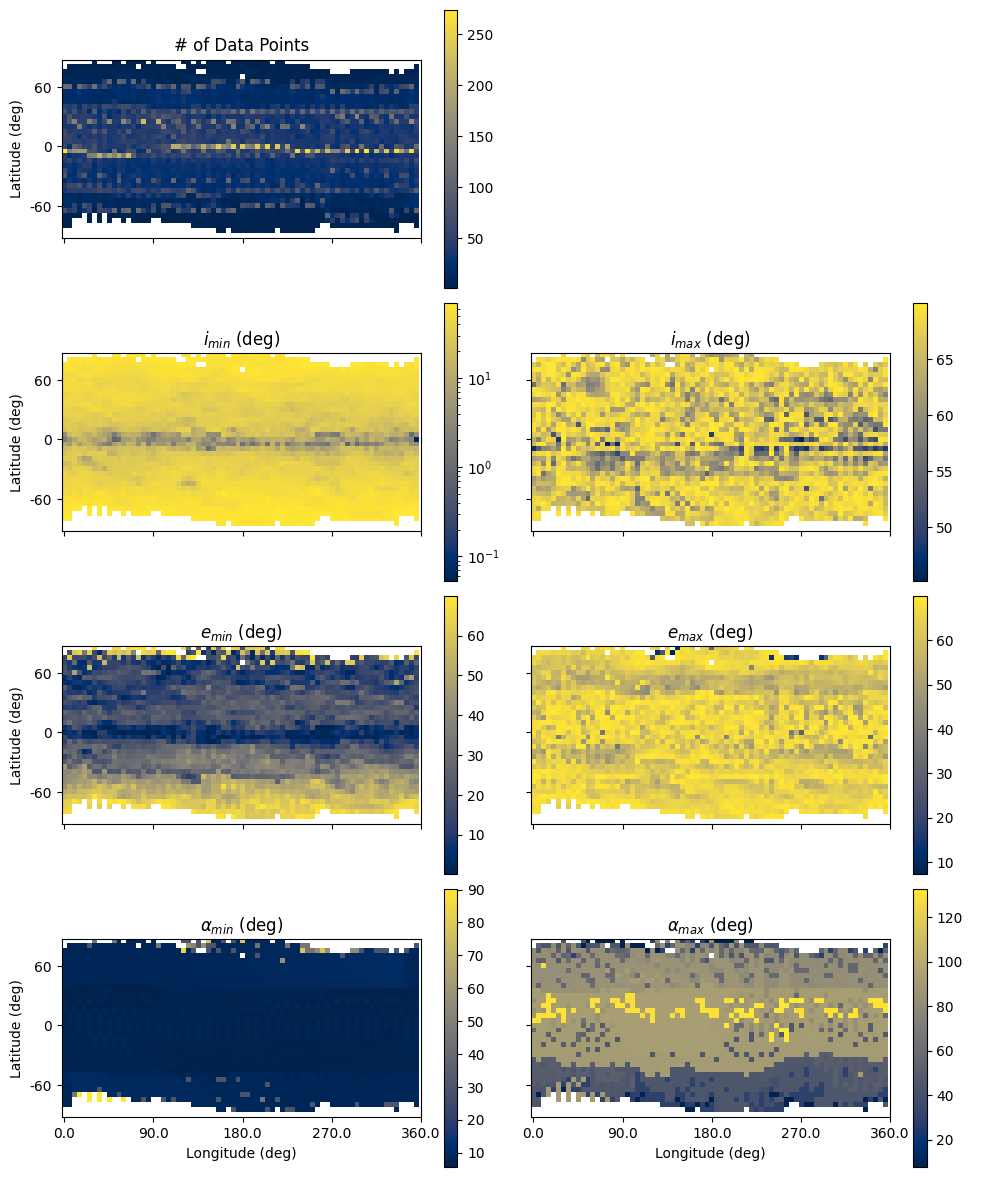

In [10]:
##GPT fixed
## plot——info 


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig = plt.figure(figsize=(10, 12))

info0 = pdg.info()
info = info0['info']
figno = None
cmap = 'cividis'
# viridis，色盲友好的色系：
# plasma: 高对比度、亮度变化平滑的红紫色系。
# cividis: 专门优化为对色盲更友好，类似于 viridis。
# magma: 暗到亮的紫橙黄色系，适合展示高动态范围数据。
# inferno: 暗到亮的红黄渐变色系


sz = pdg.lat.shape[0] - 1, pdg.lon.shape[0] - 1

keys = ['incmin', 'incmax', 'emimin', 'emimax', 'phamin', 'phamax']
titles = [r'$i_{min}$ (deg)', r'$i_{max}$ (deg)', r'$e_{min}$ (deg)',
          r'$e_{max}$ (deg)', r'$\alpha_{min}$ (deg)', r'$\alpha_{max}$ (deg)']
f, ax = plt.subplots(4, 2, figsize=(10, 12), num=figno, sharex=True, sharey=True)
count = np.reshape(info['count'], sz)
count[count == 0] = np.nan
norm = LogNorm() if (np.nanmax(count) / np.nanmin(count)) > 1e3 else None

im = ax[0, 0].imshow(count, norm=norm, cmap=cmap, origin="lower")  # Ensure lat is not flipped
plt.colorbar(mappable=im, ax=ax[0, 0])
ax[0, 0].set_title('# of Data Points')

axs = ax.flatten()[2:8]
for i, a in enumerate(axs):
    # Get data and ensure it's dimensionless
    data = np.reshape(info[keys[i]], sz)
    if hasattr(data, 'unit'):
        data = data.value
    
    # Determine normalization
    norm = LogNorm() if (np.nanmax(data) / np.nanmin(data)) > 1e3 else None

    # Plot data
    im = a.imshow(data, cmap=cmap, origin="lower", norm=norm)

    # Add colorbar and title
    plt.colorbar(mappable=im, ax=a)
    a.set_title(titles[i])



ax[0, 1].axis('off')

lonmin = info0['lon'].value.min()
lonmax = info0['lon'].value.max()
latmin = info0['lat'].value.min()
latmax = info0['lat'].value.max()

# 设置纬度刻度
lat_ticks = [-60, 0, 60]
ax[0, 0].set_yticks([(tick - latmin) / (latmax - latmin) * sz[0] for tick in lat_ticks])
ax[0, 0].set_yticklabels([f"{tick}" for tick in lat_ticks])

# 确保 longitude 范围正确
lonmin = 0   # 最小经度值
lonmax = 360 # 最大经度值

# 创建线性分布的经度刻度
lon_ticks = np.linspace(lonmin, lonmax, num=5)  # 线性分割为 5 个刻度点

# 将 xticks 转换为图像索引范围
ax[0, 0].set_xticks([(tick - lonmin) / (lonmax - lonmin) * sz[1] for tick in lon_ticks])

# 设置 xticklabels 为实际的经度值
ax[0, 0].set_xticklabels([f"{tick:.1f}" for tick in lon_ticks])


# 添加刻度标签
for a in ax[:, 0]:
    a.set_ylabel('Latitude (deg)')
for a in ax[-1]:
    a.set_xlabel('Longitude (deg)')


f.tight_layout()
plt.show()


In [33]:
# fit to model

from jylipy.photometry import Akimov_LinMag

m0 = Akimov_LinMag(0.04, 0.025)
fit = pdg.fit(m0, ilim=[0,75],elim=[0,75],alim=[7,100])

#fit.model.write('Modeling/20200428/phogrid_PS-DS_noBBD2-noRecon_segreject_5deg_pha7-100_AkiLin.fits', overwrite=True)


Grid (0, 0) of (0-36, 0-72): not fitted.
Grid (0, 1) of (0-36, 0-72): not fitted.
Grid (0, 2) of (0-36, 0-72): not fitted.
Grid (0, 3) of (0-36, 0-72): not fitted.
Grid (0, 4) of (0-36, 0-72): not fitted.
Grid (0, 5) of (0-36, 0-72): not fitted.
Grid (0, 6) of (0-36, 0-72): not fitted.
Grid (0, 7) of (0-36, 0-72): not fitted.
Grid (0, 8) of (0-36, 0-72): not fitted.
Grid (0, 9) of (0-36, 0-72): not fitted.
Grid (0, 10) of (0-36, 0-72): not fitted.
Grid (0, 11) of (0-36, 0-72): not fitted.
Grid (0, 12) of (0-36, 0-72): not fitted.
Grid (0, 13) of (0-36, 0-72): not fitted.
Grid (0, 14) of (0-36, 0-72): not fitted.
Grid (0, 15) of (0-36, 0-72): not fitted.
Grid (0, 16) of (0-36, 0-72): not fitted.
Grid (0, 17) of (0-36, 0-72): not fitted.
Grid (0, 18) of (0-36, 0-72): not fitted.
Grid (0, 19) of (0-36, 0-72): not fitted.
Grid (0, 20) of (0-36, 0-72): not fitted.
Grid (0, 21) of (0-36, 0-72): not fitted.
Grid (0, 22) of (0-36, 0-72): not fitted.
Grid (0, 23) of (0-36, 0-72): not fitted.
Gr

/Users/zouxd/miniconda3/envs/envjp/lib/python3.9/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in arccos
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Grid (17, 59) of (0-36, 0-72): Model: Akimov_LinMag
Inputs: ('pha', 'lat', 'lon')
Outputs: ('r',)
Model set size: 1393
Parameters:
             A0                  beta        
    -------------------- --------------------
    0.052329550994842156  0.02443785084297062
     0.07139038287685637 0.024788807677661742
    0.059407001930323104  0.02464284684578691
     0.05940406344252358    0.024823994211204
     0.04706823468449062   0.0247057620545412
     0.04620162347764695 0.024519285463986868
     0.04701763029290514 0.024638062503187622
                     ...                  ...
                     0.0 0.017096237889072115
                     0.0 0.018189676859206284
                     0.0   0.0192000207985748
                     0.0  0.02013656366292922
                     0.0 0.021006664207820838
                     0.0 0.021818552988076154
                     0.0 0.022576749989278718
    Length = 1393 rows
Grid (17, 60) of (0-36, 0-72): Model: Akimov_LinMag
Inputs: ('ph

In [35]:
fit.model.write('/Users/zouxd/Documents/--Tools--/-PY/Py/jyli_Example_2022-08/Data/phogrid_PS-DS_noBBD2-noRecon_segreject_5deg_pha7-100_AkiLin.fits', overwrite=True)

In [45]:
#filepar = '/Users/zouxd/Documents/--Tools--/-PY/Py/jyli_Example_2022-08/Data/phogrid_PS-DS_noBBD2-noRecon_segreject_5deg_pha7-100_AkiLin.fits'

#par = PhotometricDataGrid(datafile=filepar)
#print("parinfo:", fit.parinfo)
#print("xall:", fit.xall)


In [46]:
filepar = '/Users/zouxd/Documents/--Tools--/-PY/Py/jyli_Example_2022-08/Data/phogrid_PS-DS_noBBD2-noRecon_segreject_5deg_pha7-100_AkiLin.fits'

fits.info(filepar)

Filename: /Users/zouxd/Documents/--Tools--/-PY/Py/jyli_Example_2022-08/Data/phogrid_PS-DS_noBBD2-noRecon_segreject_5deg_pha7-100_AkiLin.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  LON           1 ImageHDU         8   (73,)   float32   
  2  LAT           1 ImageHDU         8   (37,)   float32   
  3  MASK          1 ImageHDU         8   (72, 36)   uint8   
  4  A0            1 ImageHDU         9   (1393, 72, 36)   float32   
  5  BETA          1 ImageHDU         9   (1393, 72, 36)   float32   
  6  RMS           1 ImageHDU         9   (1393, 72, 36)   float32   
  7  RRMS          1 ImageHDU         9   (1393, 72, 36)   float32   


In [47]:
# load model grid

from jylipy.photometry import ModelGrid

mg = ModelGrid(datafile=filepar)
mg.shape

(36, 72)

In [ ]:
# save model grid to disk
#from astropy.io import fits
# fit.model.write('akimov_model_map.fits', overwrite=True)

# fits.info('akimov_model_map.fits')

In [42]:
print(dir(astropy.io.fits))
      

['BITPIX2DTYPE', 'BinTableHDU', 'Card', 'ColDefs', 'Column', 'CompImageHDU', 'CompImageSection', 'Conf', 'DELAYED', 'DTYPE2BITPIX', 'Delayed', 'FITSDiff', 'FITS_rec', 'FITS_record', 'FitsHDU', 'Group', 'GroupData', 'GroupsHDU', 'HDUDiff', 'HDUList', 'Header', 'HeaderDiff', 'ImageDataDiff', 'ImageHDU', 'PrimaryHDU', 'RawDataDiff', 'Section', 'StreamingHDU', 'TableDataDiff', 'TableHDU', 'Undefined', 'VerifyError', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_config', '_utils', 'append', 'card', 'column', 'conf', 'connect', 'convenience', 'delval', 'diff', 'file', 'fitsrec', 'getdata', 'getheader', 'getval', 'hdu', 'header', 'info', 'open', 'printdiff', 'register_hdu', 'setval', 'table_to_hdu', 'tabledump', 'tableload', 'unregister_hdu', 'update', 'util', 'verify', 'writeto']


In [55]:
import numpy as np
import matplotlib.pyplot as plt

def plot_latlon_grid(self, keys=None, band=None, lim=None, figno=None, cmap='viridis'):
    """
    Plot the model parameter maps on a lat-lon grid.

    Parameters
    ----------
    keys : list of str, optional
        Parameter names to plot. Default: all available parameters.
    band : int, optional
        Band index to plot. Default: middle band.
    lim : list of tuples, optional
        Limits for each key [(vmin, vmax), ...]. Default: auto-scaled.
    figno : int, optional
        Figure number. Default: create a new figure.
    cmap : str or Colormap, optional
        Colormap for plots. Default: 'viridis'.

    Returns
    -------
    ax : matplotlib axes
        Axes of the generated plots.
    """
    if keys is None:
        keys = self.param_names  # Default to all parameters
    idx = np.where(~self.mask.flatten())[0][0]
    n_band = len(self._model_grid.flatten()[idx])
    if n_band > 1:
        if band is None:
            band = n_band // 2  # Default to middle band
    if figno is None:
        figno = plt.figure().number
    n_keys = len(keys)
    nrows = int(np.ceil(n_keys / 2))
    f, ax = plt.subplots(nrows, 2, num=figno, sharex=True, sharey=True, figsize=(10, nrows * 4))
    ax1d = ax.flatten()

    for i, k in enumerate(keys):
        v = getattr(self, k, None)
    if v is None:
        v = self.extra.get(k.lower()) or self.extra.get(k.upper())
        if v is None:
            raise ValueError(f"'{k}' not found.")

    v = np.array(v)  # Convert to a NumPy array


    if len(v.shape) == 3:  # Handle 3D arrays with bands
        if band is None or band >= v.shape[0]:
            band = v.shape[0] // 2  # Default to middle band
        print(f"Using band index {band} for key '{k}'")
        v = v[band, :, :]  # Select the band
    elif len(v.shape) != 2:
        raise ValueError(f"Unexpected shape for key '{k}': {v.shape}")



    # Apply the mask
    v = np.where(self.mask, np.nan, v)

    # Set plot limits
    vmin, vmax = lim[i] if lim else (None, None)

    # Plot data
    im = ax1d[i].imshow(v, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(mappable=im, ax=ax1d[i])
    ax1d[i].set_title(k)

    
    # Handle unused subplot slots
    for j in range(i + 1, len(ax1d)):
        ax1d[j].axis('off')

    # Add axis labels and ticks
    lonmin, lonmax = self.lon.value.min(), self.lon.value.max()
    latmin, latmax = self.lat.value.min(), self.lat.value.max()
    ax1d[0].set_xticks(np.linspace(0, self.shape[1] - 1, 5))
    ax1d[0].set_xticklabels(np.linspace(lonmin, lonmax, 5).round(2))
    ax1d[0].set_yticks(np.linspace(0, self.shape[0] - 1, 5))
    ax1d[0].set_yticklabels(np.linspace(latmin, latmax, 5).round(2))
    for a in ax[:, 0]:
        a.set_ylabel(f'Latitude ({self.lat.unit})')
    for a in ax[-1]:
        a.set_xlabel(f'Longitude ({self.lon.unit})')

    return ax


Using band index 18 for key 'RRMS'


ValueError: operands could not be broadcast together with shapes (36,72) () (72,1393) 

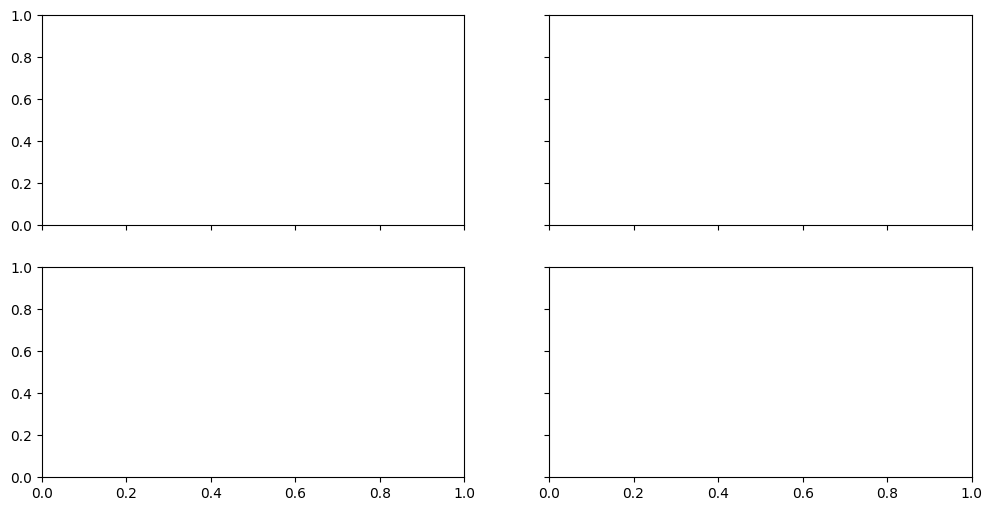

In [56]:
# plot model parameters

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
plot_latlon_grid(mg, figno=fig.number, keys=['A0', 'beta', 'RRMS'], band=700, lim=[[0.037, 0.044], [0.018, 0.028], [0.01, 0.07]])

In [57]:
mg.param_names



('A0', 'beta')

In [58]:
print(mg[18,10])


Model: Akimov_LinMag
Inputs: ('pha', 'lat', 'lon')
Outputs: ('r',)
Model set size: 1393
Parameters:
             A0                  beta        
    -------------------- --------------------
    0.051710352301597595 0.020887525752186775
     0.07011615484952927   0.0209586713463068
     0.05884619429707527 0.021158449351787567
    0.058326300233602524  0.02096433937549591
    0.046609435230493546  0.02110465243458748
     0.04579677805304527 0.021026140078902245
     0.04667631909251213  0.02126295492053032
                     ...                  ...
                     0.0 0.027523566037416458
                     0.0 0.028282027691602707
                     0.0 0.028983306139707565
                     0.0 0.029633617028594017
                     0.0   0.0302396472543478
                     0.0 0.030803954228758812
                     0.0 0.031332917511463165
    Length = 1393 rows


In [ ]:
from jylipy.projects.orex import PhotometricData


In [ ]:
import pysis.isis

# Print all available attributes and methods in pysis.isis
print(dir(pysis.isis))


In [ ]:
# Check if automos or similar function is available
if hasattr(pysis.isis, 'automos'):
    automos = pysis.isis.automos
else:
    print("automos function not found in pysis.isis")

In [ ]:
import pysis_ext


In [ ]:
#write a code to get all  the A0 parameters of grids in nlat range and write them into three simple csv files
import csv

# Function to extract and write A0 parameters to CSV files

def write_a0_to_csv(model_grid, nlat_range, nlon_total, output_dir='output'):
    for nlat in nlat_range:
        # Initialize an empty list to store data for each longitude grid point
        data = [[] for _ in range(nlon_total)]

        for nlon in range(nlon_total):
            # Get the model for the current grid point
            model = model_grid[nlat, nlon]
            # Extract the A0 parameters
            a0_values = model.A0
            # Append the A0 values to the respective column in data
            for row in range(len(a0_values)):
                data[nlon].append(a0_values[row])

        # Write the data to a CSV file
        csv_filename = f'{output_dir}/A0_nlat_{nlat}.csv'
        with open(csv_filename, mode='w', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            # Transpose the data to write rows as columns
            for row in zip(*data):
                csv_writer.writerow(row)

# Usage example
nlat_range = [21, 22, 23]  # Range of latitude grid points
nlon_total = 72  # Total number of longitude grid points

# Ensure the output directory exists
import os
output_dir = '/Users/zouxd/2024Beth-Project/OREX-photometric_correction'


# Assuming mg is your ModelGrid instance
write_a0_to_csv(mg, nlat_range, nlon_total, output_dir)

In [ ]:

def read_csv_data(file_path):
    data = []
    with open(file_path, mode='r') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            data.append([float(value) for value in row])
    return data

# Read data from each CSV file
data_nlat_21 = read_csv_data('/Users/zouxd/2024Beth-Project/OREX-photometric_correction/A0_nlat_21_addwav.csv')
#data_nlat_22 = read_csv_data('output/A0_nlat_22.csv')
#data_nlat_23 = read_csv_data('output/A0_nlat_23.csv')

# Print the first few rows of the data for nlat=21
for row in data_nlat_21[:5]:
    print(row)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Function to read data from CSV file and plot the data
def plot_r_values_and_find_slopes(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, header=None)
    
    # Extract wavelength values (first column)
    wav = df.iloc[:, 0].values
    
    # Extract r values (all other columns)
    r_values = df.iloc[:, 1:].values
    
    # Plot r values for each grid
    plt.figure(figsize=(12, 8))
    for i in range(r_values.shape[1]):
        plt.plot(wav, r_values[:, i], label=f'Grid {i}')
    
    plt.xlabel('Wavelength')
    plt.ylabel('r values')
    plt.title('r values for each grid')
    #plt.legend(loc='best', ncol=2, fontsize='small')
    plt.show()
    
    # Calculate slopes for each grid
    slopes = []
    for i in range(r_values.shape[1]):
        slope = np.polyfit(wav, r_values[:, i], 1)[0]
        slopes.append(slope)
    
    # Find the indices with the min and max slopes
    min_slope_index = np.argmin(slopes)
    max_slope_index = np.argmax(slopes)
    
    print(f"Grid with minimum slope: {min_slope_index}")
    print(f"Grid with maximum slope: {max_slope_index}")
    
    return min_slope_index, max_slope_index

# Usage example
file_path = '/Users/zouxd/2024Beth-Project/OREX-photometric_correction/A0_nlat_21_addwav.csv'  # Replace with the correct file path
min_slope_index, max_slope_index = plot_r_values_and_find_slopes(file_path)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from CSV file, plot the data with wavelength limits, and find min/max slopes
def plot_r_values_and_find_slopes(file_path, wav_min=0.45, wav_max=2.45):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, header=None)
    
    # Extract wavelength values (first column)
    wav = df.iloc[:, 0].values
    
    # Extract r values (all other columns)
    r_values = df.iloc[:, 1:].values
    
    # Apply wavelength limits
    wav_mask = (wav >= wav_min) & (wav <= wav_max)
    wav_limited = wav[wav_mask]
    r_values_limited = r_values[wav_mask, :]
    
    # Plot r values for each grid within the wavelength limits
    plt.figure(figsize=(12, 8))
    for i in range(r_values_limited.shape[1]):
        plt.plot(wav_limited, r_values_limited[:, i], label=f'Grid {i}')
    
    plt.xlabel('Wavelength')
    plt.ylabel('r values')
    plt.title(f'r values for each grid (Wavelength {wav_min}-{wav_max})')
    #plt.legend(loc='best', ncol=2, fontsize='small')
    plt.xlim(wav_min, wav_max)
    plt.show()
    
    # Calculate slopes for each grid within the wavelength limits
    slopes = []
    for i in range(r_values_limited.shape[1]):
        slope = np.polyfit(wav_limited, r_values_limited[:, i], 1)[0]
        slopes.append(slope)
    
    # Find the indices with the min and max slopes
    min_slope_index = np.argmin(slopes)
    max_slope_index = np.argmax(slopes)
    
    # Print the indices and slope values
    print(f"Grid with minimum slope: {min_slope_index} (slope: {slopes[min_slope_index]})")
    print(f"Grid with maximum slope: {max_slope_index} (slope: {slopes[max_slope_index]})")
    
    return min_slope_index, max_slope_index, slopes[min_slope_index], slopes[max_slope_index]
# Usage example
file_path = '/Users/zouxd/2024Beth-Project/OREX-photometric_correction/A0_nlat_22_addwav.csv'  # Replace with the correct file path
min_slope_index, max_slope_index, min_slope, max_slope = plot_r_values_and_find_slopes(file_path)

In [ ]:
file_path = '/Users/zouxd/2024Beth-Project/OREX-photometric_correction/A0_nlat_22_addwav.csv'
wav_min=0.45
wav_max=2.45

df = pd.read_csv(file_path, header=None)
    
# Extract wavelength values (first column)
wav = df.iloc[:, 0].values
    
# Extract r values (all other columns)
r_values = df.iloc[:, 1:].values
# Apply wavelength limits
wav_mask = (wav >= wav_min) & (wav <= wav_max)
wav_limited = wav[wav_mask]
r_values_limited = r_values[wav_mask, :]
    
# Plot r values for each grid within the wavelength limits
plt.figure(figsize=(12, 8))

plt.plot(wav_limited, r_values_limited[:, 58]/r_values_limited[54,58], label="nlon = 58")
plt.plot(wav_limited, r_values_limited[:, 41]/r_values_limited[54,40], label="nlon = 41")
plt.xlabel('Wavelength')
plt.ylabel('r values')
plt.title(f'r values for each grid (Wavelength {wav_min}-{wav_max})')
plt.legend(loc='best', ncol=2, fontsize='small')
plt.xlim(wav_min, wav_max)
plt.show()



In [ ]:
# Combine wav_limited and r_values_limited into a DataFrame
data_to_save = pd.DataFrame(r_values_limited[:, 40])
data_to_save.insert(0, 'Wavelength', wav_limited)

# Save to CSV
output_file_path = '/Users/zouxd/2024Beth-Project/OREX-photometric_correction/limited_wav_and_r_values.csv'
data_to_save.to_csv(output_file_path, index=False)

print(f'Saved limited wavelength and r values to {output_file_path}')